In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import missingno as mns

In [9]:
df = pd.read_csv("Spotify_2024_Global_Streaming_Data.csv")
df.head()

,Country,Artist,Album,Genre,Release Year,Monthly Listeners (Millions),Total Streams (Millions),Total Hours Streamed (Millions),Avg Stream Duration (Min),Platform Type,Streams Last 30 Days (Millions),Skip Rate (%)
0,Germany,Taylor Swift,1989 (Taylor's Version),K-pop,2019,23.10,3695.53,14240.35,4.28,Free,118.51,2.24
1,Brazil,The Weeknd,After Hours,R&B,2022,60.60,2828.16,11120.44,3.90,Premium,44.87,23.98
2,United States,Post Malone,Austin,Reggaeton,2023,42.84,1425.46,4177.49,4.03,Free,19.46,4.77
3,Italy,Ed Sheeran,Autumn Variations,K-pop,2018,73.24,2704.33,12024.08,3.26,Premium,166.05,25.12
4,Italy,Ed Sheeran,Autumn Variations,R&B,2023,7.89,3323.25,13446.32,4.47,Free,173.43,15.82


<Axes: >

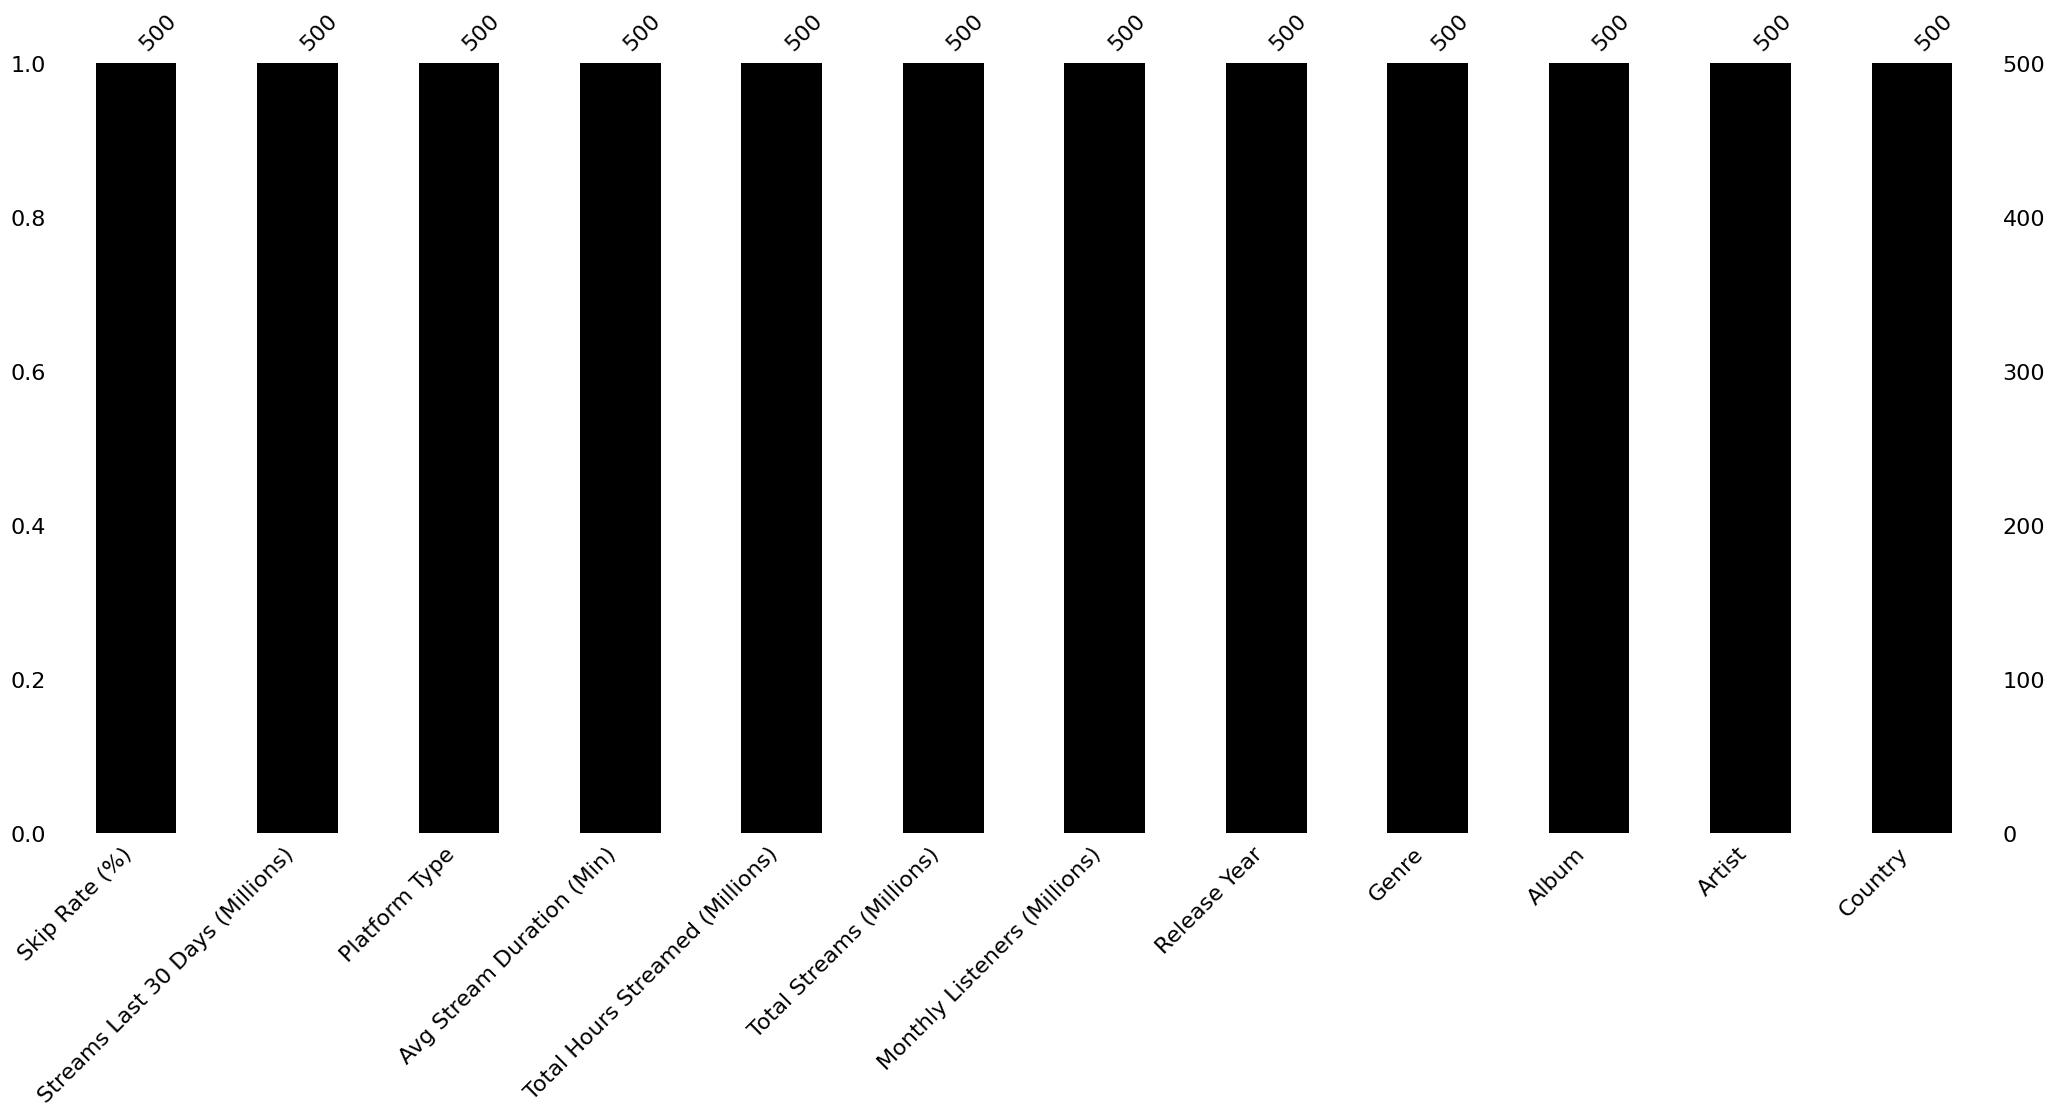

In [10]:
mns.bar(df, sort='descending',color = 'black')

In [11]:
label_encoders = {}
for col in ['Country', 'Artist', 'Album', 'Genre', 'Platform Type']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [12]:
feature_cols = [
    'Country', 'Artist', 'Album', 'Genre', 'Release Year',
    'Monthly Listeners (Millions)', 'Total Hours Streamed (Millions)',
    'Avg Stream Duration (Min)', 'Platform Type', 'Streams Last 30 Days (Millions)']

In [13]:
X = df[feature_cols]
y = df['Total Streams (Millions)']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [16]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [17]:
print("MSE:", mse)
print("R^2 Score:", r2)

MSE: 248679.95605196446
R^2 Score: 0.8648564192715164


C:\Users\KPEKPE\AppData\Local\Temp\ipykernel_6656\2330148434.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')


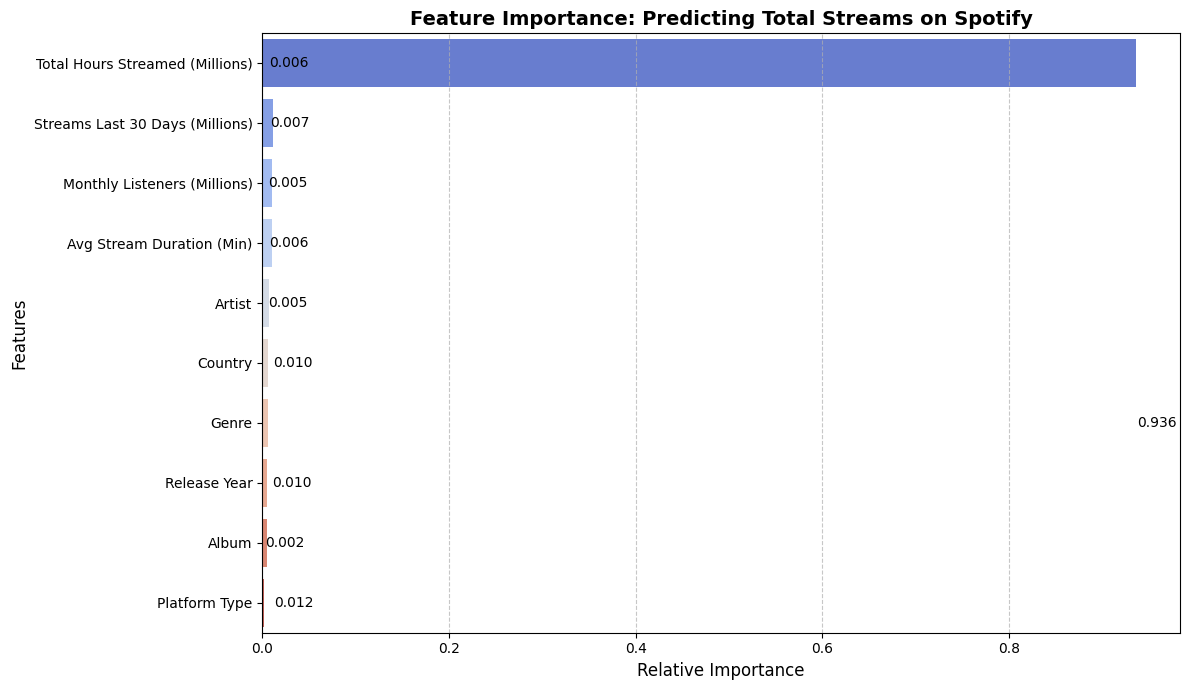

In [18]:
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')
for index, row in feature_importance_df.iterrows():
    plt.text(row['Importance'] + 0.001, index, f"{row['Importance']:.3f}", va='center')

plt.title('Feature Importance: Predicting Total Streams on Spotify', fontsize=14, weight='bold')
plt.xlabel('Relative Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("total_streams_feature_importance_better.png")
plt.show()

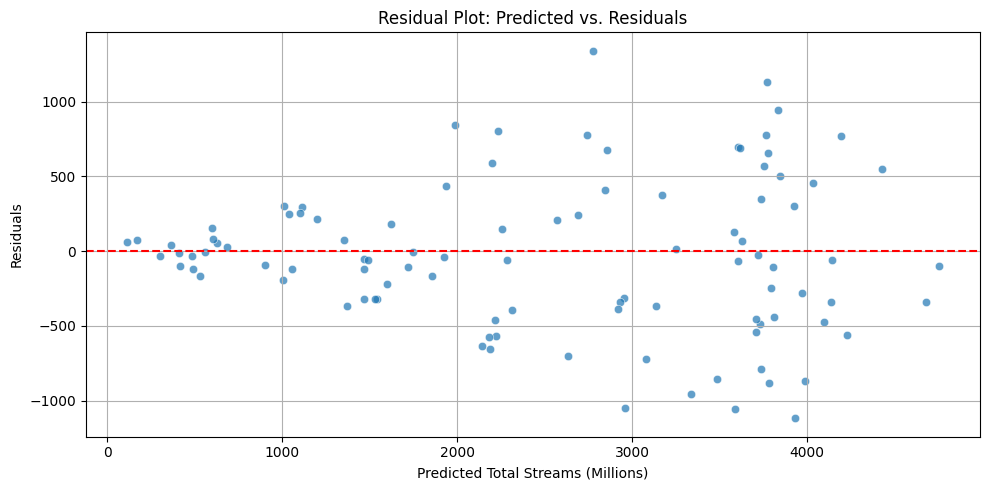

In [20]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot: Predicted vs. Residuals')
plt.xlabel('Predicted Total Streams (Millions)')
plt.ylabel('Residuals')
plt.grid(True)
residual_plot_path = "/mnt/data/residual_plot.png"
plt.tight_layout()
plt.show()

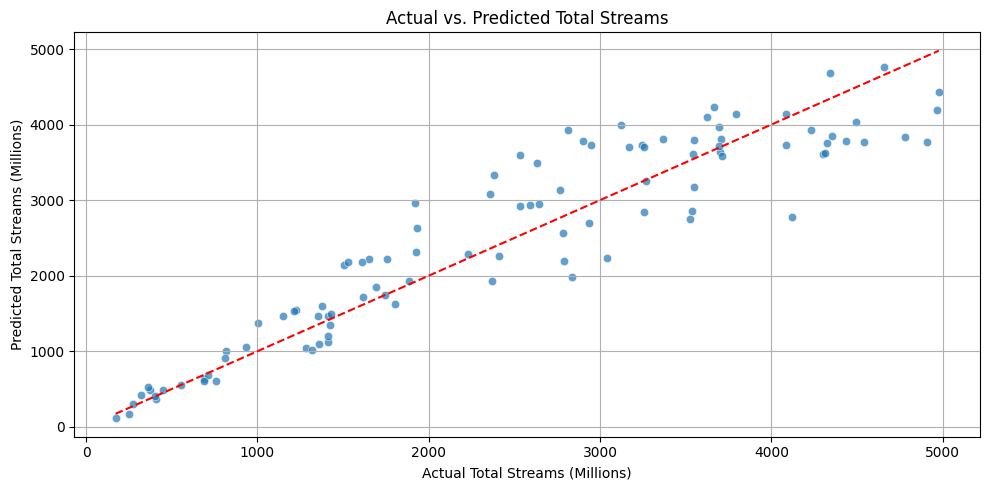

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs. Predicted Total Streams')
plt.xlabel('Actual Total Streams (Millions)')
plt.ylabel('Predicted Total Streams (Millions)')
plt.grid(True)
actual_vs_pred_path = "/mnt/data/actual_vs_predicted_plot.png"
plt.tight_layout()
plt.show()